In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from keras.models import load_model
import keras.backend as K
import pickle

In [2]:
def WRONG_Masked_Mean_Absolute_Error(y_true, y_pred):
    '''Wrong version of masked mean absolut error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    loss = K.sum(
                K.sum(
                        K.abs(y_true - y_pred) * A_i, 
                        axis=(1,2,3)
                ) 
                    /
                K.sum(
                        A_i,
                        axis=(1,2,3)
                )
           )
    return loss


def Masked_Mean_Absolute_Error(y_true, y_pred):
    '''Masked mean absolut error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    loss = K.mean(
                K.sum(
                        K.abs(y_true - y_pred) * A_i,
                        axis=(1,2,3)
                     )
                /
                K.sum(A_i, axis=(1,2,3))
            )
    lower_boundary = K.less(y_pred, 0)
    lower_boundary = K.cast(lower_boundary, dtype='float32')
    upper_boundary = K.greater(y_pred, 65535)
    upper_boundary = K.cast(upper_boundary, dtype='float32')
    interval_loss = K.sum(lower_boundary * 10000 + upper_boundary * 10000)   
    return loss+interval_loss


def Masked_Mean_Absolute_Error_Sigmoid(y_true, y_pred):
    '''Masked mean absolut error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # Since we are using a sigmoid activation function, scale the predictions from [0,1] to [0,65535]
    y_pred = y_pred * 65535
    loss = K.mean(
                K.sum(
                        K.abs(y_true - y_pred) * A_i,
                        axis=(1,2,3)
                     )
                /
                K.sum(A_i, axis=(1,2,3))
            )
    lower_boundary = K.less(y_pred, 0)
    lower_boundary = K.cast(lower_boundary, dtype='float32')
    upper_boundary = K.greater(y_pred, 65535)
    upper_boundary = K.cast(upper_boundary, dtype='float32')
    interval_loss = K.sum(lower_boundary * 10000 + upper_boundary * 10000)   
    return loss+interval_loss


def Masked_Mean_Absolute_Error_Simple(y_true, y_pred):
    '''Masked mean absolut error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    loss = K.mean(
                K.sum(
                        K.abs(y_true - y_pred) * A_i,
                        axis=(1,2,3)
                     )
                /
                K.sum(A_i, axis=(1,2,3))
            ) 
    return loss


def Masked_Mean_Absolute_Error_Simple_Sigmoid(y_true, y_pred):
    '''Masked mean absolut error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # Since we are using a sigmoid activation function, scale the predictions from [0,1] to [0,65535]
    y_pred = y_pred * 65535
    loss = K.mean(
                K.sum(
                        K.abs(y_true - y_pred) * A_i,
                        axis=(1,2,3)
                     )
                /
                K.sum(A_i, axis=(1,2,3))
            ) 
    return loss


def Masked_Root_Mean_Squared_Error(y_true, y_pred):
    '''Masked root mean squared error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # original K.sqrt(K.mean(K.square(y_true - y_pred)))
    loss = K.sqrt(
            K.mean(
                    K.sum(
                            K.square(y_true - y_pred) * A_i,
                            axis=(1,2,3)
                         )
                    /
                    K.sum(A_i, axis=(1,2,3))
                  )
            )
    lower_boundary = K.less(y_pred, 0)
    lower_boundary = K.cast(lower_boundary, dtype='float32')
    upper_boundary = K.greater(y_pred, 65535)
    upper_boundary = K.cast(upper_boundary, dtype='float32')
    interval_loss = K.sum(lower_boundary * 10000 + upper_boundary * 10000)   
    return loss+interval_loss


def Masked_Root_Mean_Squared_Error_Sigmoid(y_true, y_pred):
    '''Masked root mean squared error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # Since we are using a sigmoid activation function, scale the predictions from [0,1] to [0,65535]
    y_pred = y_pred * 65535
    # original K.sqrt(K.mean(K.square(y_true - y_pred)))
    loss = K.sqrt(
            K.mean(
                    K.sum(
                            K.square(y_true - y_pred) * A_i,
                            axis=(1,2,3)
                         )
                    /
                    K.sum(A_i, axis=(1,2,3))
                  )
            )
    lower_boundary = K.less(y_pred, 0)
    lower_boundary = K.cast(lower_boundary, dtype='float32')
    upper_boundary = K.greater(y_pred, 65535)
    upper_boundary = K.cast(upper_boundary, dtype='float32')
    interval_loss = K.sum(lower_boundary * 10000 + upper_boundary * 10000)   
    return loss+interval_loss


def Masked_Root_Mean_Squared_Error_Simple(y_true, y_pred):
    '''Masked root mean squared error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # original K.sqrt(K.mean(K.square(y_true - y_pred)))
    loss = K.sqrt(
            K.mean(
                    K.sum(
                            K.square(y_true - y_pred) * A_i,
                            axis=(1,2,3)
                         )
                    /
                    K.sum(A_i, axis=(1,2,3))
                  )
            ) 
    return loss


def Masked_Root_Mean_Squared_Error_Simple_Sigmoid(y_true, y_pred):
    '''Masked root mean squared error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # Since we are using a sigmoid activation function, scale the predictions from [0,1] to [0,65535]
    y_pred = y_pred * 65535
    # original K.sqrt(K.mean(K.square(y_true - y_pred)))
    loss = K.sqrt(
            K.mean(
                    K.sum(
                            K.square(y_true - y_pred) * A_i,
                            axis=(1,2,3)
                         )
                    /
                    K.sum(A_i, axis=(1,2,3))
                  )
            ) 
    return loss


def berHu(c):
    '''Reverse Huber loss as stated in paper "Deeper Depth Prediction with Fully Convolutional Residual Networks" by Laina et al. and "The berhu
       penalty and the grouped effect" by L. Zwald and S. Lambert-Lacroix'''
    # does this current implementation makes sense? --> yes, it returns mae or mse
    # TODO implement this with binary mask too?
    def inverse_huber(y_true, y_pred):
        threshold = c * K.max(K.abs(y_true - y_pred))
        absolute_mean = K.mean(K.abs(y_true - y_pred))
        mask = K.less_equal(absolute_mean, threshold)
        mask = K.cast(mask, dtype='float32')
        return mask * absolute_mean + (1-mask) * K.mean(K.square(K.abs(y_true - y_pred)))
    return inverse_huber

In [23]:
#path_model = os.path.join('I:', 'Beleg', 'results', 'models', 'model_sgd_100_MMAE.h5')
path_model = '/media/julien/Transcend/Beleg/results/models/model_sgd_100_MMAE.h5'
#path_images = os.path.join('Images')
#path_val_images = os.path.join('I:', 'Beleg', 'data', 'validation')
path_val_images = '/media/julien/Transcend/Beleg/data/validation'

In [4]:
model = load_model(path_model, custom_objects={'Masked_Mean_Absolute_Error':Masked_Mean_Absolute_Error,
                                                   'Masked_Mean_Absolute_Error_Simple':Masked_Mean_Absolute_Error_Simple, 
                                                   'Masked_Mean_Absolute_Error_Simple_Sigmoid':Masked_Mean_Absolute_Error_Simple_Sigmoid,
                                                   'Masked_Mean_Absolute_Error_Sigmoid':Masked_Mean_Absolute_Error_Sigmoid,
                                                   'Masked_Root_Mean_Squared_Error':Masked_Root_Mean_Squared_Error,
                                                   'Masked_Root_Mean_Squared_Error_Simple':Masked_Root_Mean_Squared_Error_Simple,
                                                   'Masked_Root_Mean_Squared_Error_Simple_Sigmoid':Masked_Root_Mean_Squared_Error_Simple_Sigmoid,
                                                   'Masked_Root_Mean_Squared_Error_Sigmoid':Masked_Root_Mean_Squared_Error_Sigmoid,
                                                   'inverse_huber':berHu(0.2)})

W1127 17:13:19.112056 140712621971264 deprecation_wrapper.py:119] From /home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1127 17:13:19.411672 140712621971264 deprecation_wrapper.py:119] From /home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1127 17:13:19.459558 140712621971264 deprecation_wrapper.py:119] From /home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1127 17:13:19.462177 140712621971264 deprecation_wrapper.py:119] From /home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is depre

In [7]:
ir = cv2.imread(os.path.join(path_images, 'ir.png'), cv2.IMREAD_ANYDEPTH)
color = cv2.imread(os.path.join(path_images, 'color.jpg'), cv2.IMREAD_COLOR)
depth = cv2.imread(os.path.join(path_images, 'depth.png'), cv2.IMREAD_ANYDEPTH)

In [62]:
ranges = [0, 65535]
number_bins = 100
hist_cv = cv2.calcHist(ir, [1], None, [number_bins], ranges)

In [63]:
hist_np, bin_edges = np.histogram(ir, number_bins, (ranges[0], ranges[1]))

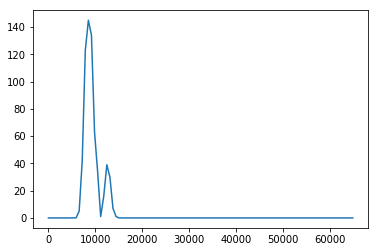

In [66]:
%matplotlib inline
plt.plot(bin_edges[0:-1], hist_cv)
plt.show()

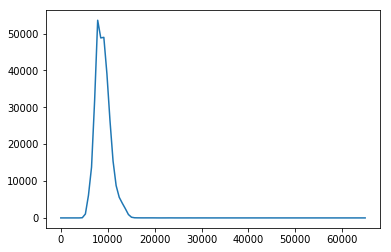

In [67]:
%matplotlib inline
plt.plot(bin_edges[0:-1], hist_np)
plt.show()

In [24]:
available_files = os.listdir(os.path.join(path_val_images, 'Color'))
files = [Path(file).stem for file in available_files if Path(file).suffix == '.jpg']

In [25]:
cumulative_hist_depth_val = np.zeros((150,), dtype=np.int64)
cumulative_hist_ir_val = np.zeros((150,), dtype=np.int64)
for name in files:
    depth = cv2.imread(os.path.join(path_val_images, 'Depth', name+'.png'), cv2.IMREAD_ANYDEPTH)
    hist, bins = np.histogram(depth, 150, (0,65535))
    cumulative_hist_depth_val += hist
    ir = cv2.imread(os.path.join(path_val_images, 'Infrared', name+'.png'), cv2.IMREAD_ANYDEPTH)
    hist, bins = np.histogram(ir, 150, (0,65535))
    cumulative_hist_ir_val += hist


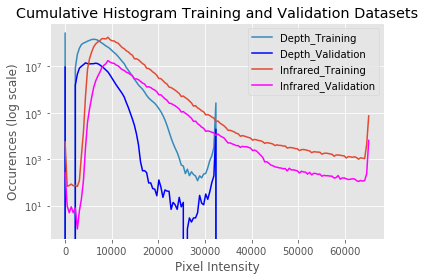

In [29]:
%matplotlib inline
plt.style.use('ggplot')
plt.plot(bins[0:-1], cumulative_hist_depth, label='Depth_Training', color='C1')
plt.plot(bins[0:-1], cumulative_hist_depth_val, label='Depth_Validation', color="blue")
plt.plot(bins[0:-1], cumulative_hist_ir, label="Infrared_Training", color='C0')
plt.plot(bins[0:-1], cumulative_hist_ir_val, label="Infrared_Validation", color="magenta")

axs = plt.gca()
axs.set_yscale('log')
axs.set_xlabel('Pixel Intensity')
axs.set_ylabel('Occurences (log scale)')
#plt.set(yscale='log')
plt.title('Cumulative Histogram Training and Validation Datasets')
plt.legend()
plt.tight_layout()
plt.savefig('histogram_datasets_depth_infrared')

In [ ]:
with open('training_hist')